$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

Anurag Kumar

## Overview

I have written and applied the code provided in the lecture notes to trains neural networks for various numbers of hidden layers and units in each hidden layer and it returns the results as specified below.  I have it once for a regression problem and once for a classification problem. 

## Required Code

I have downloaded [nn2.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar) that was used in lecture and extracted its contents, which are

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

The following functions that train and evaluate neural network models was written by using the classes and methods defined in the files downloaded above.

* `results = trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify)`

The arguments to `trainNNs` are

* `X` is a matrix of input data of shape `nSamples x nFeatures`
* `T` is a matrix of target data of shape `nSamples x nOutputs`
* `trainFraction` is fraction of samples to use as training data. 1-`trainFraction` is number of samples for testing data
* `hiddenLayerStructures` is list of network architectures. For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 5, 10, and 20 units in each layer, this argument would be `[[20], [5, 10, 20]]`.
* `numberRepetitions` is number of times to train a neural network.  Calculate training and testing average performance (two separate averages) of this many training runs.
* `numberIterations` is the number of iterations to run the scaled conjugate gradient algorithm when a neural network is trained.
* `classify` is set to `True` if you are doing a classification problem, in which case `T` must be a single column of target class integers.

This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 

* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure.

This function follows these steps:

  * For each network structure given in `hiddenLayerStructures`
    * For numberRepetitions
      * Use `ml.partition` to randomly partition X and T into training and testing sets.
      * Create a neural network of the given structure
      * Train it for numberIterations
      * Use the trained network to produce outputs for the training and for the testing sets
      * If classifying, calculate the fraction of samples incorrectly classified for training and testing sets.
       Otherwise, calculate the RMSE of training and testing sets.
      * Add the training and testing performance to a collection (such as a list) for this network structure
    * Add to a collection of all results the hidden layer structure, lists of training performance and testing performance, and seconds taken to do these repetitions.
  * return the collection of all results

Also, I have defined the following two functions. `summarize(results)` returns a list of lists like `results` but with the list of training performances replaced by their mean and the list of testing performances replaced by their mean.   
`bestNetwork(summary)` takes the output of `summarize(results)` and returns the best element of `results`, determined by the element that has the smallest test performance.

* `summary = summarize(results)` where `results` is returned by `trainNNs` and `summary` is like `results` with the training and testing performance lists replaced by their means
* `best = bestNetwork(summary)` where `summary` is returned by `summarize` and `best` is the best element of `summary`

In [5]:
import numpy as np

In [6]:
import neuralnetworks as nn

In [7]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

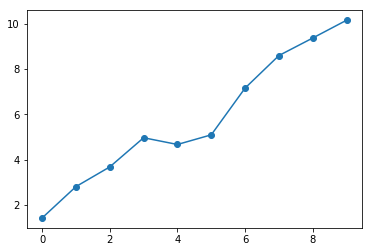

In [9]:
plt.plot(X, T, 'o-');

In [10]:
X.shape[1]

1

In [11]:
T[0].shape

(1,)

Using the NeuralNetwork class to train the neural network and tracing the error using the functions available in the package.
* `nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])`

The parameters passed in the contructor are as folows:
* `X.shape[1]` is the number of features as inputs
* `2` represents the single hidden layer of 2 units
* `T.shape[1]` is the number of outputs (in case of classification problem it is the number of classes) 

In [13]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.63552065,  0.63552065,  0.55343977,  0.23792806,
        0.21438081,  0.15866778,  0.15587736,  0.15261513,  0.15046892,
        0.15046892,  0.14209005,  0.13895589,  0.1361368 ,  0.13539873,
        0.13539873,  0.13512666,  0.13223078,  0.13195013,  0.13186276,
        0.12940465,  0.12796676,  0.12754725,  0.12690244,  0.12489431,
        0.12438113,  0.12436191,  0.12410075,  0.12408693,  0.12408218,
        0.12408218,  0.12408218,  0.12408218,  0.12408218,  0.12408218,
        0.12408218,  0.12355793,  0.12333515,  0.12329163,  0.12328128,
        0.12287396,  0.12283516,  0.12209613,  0.12209613,  0.12209613,
        0.12007446,  0.11944851,  0.11863421,  0.11859824,  0.11838271,
        0.11829855,  0.11806679,  0.11741311,  0.11732257,  0.11567386,
        0.11527366,  0.11443961,  0.1143644 ,  0.11420947,  0.11299458,
        0.11264955,  0.11255104,  0.11250683,  0.11162279,  0.11162073,
        0.11010988,  0.10979561,  0.10966456,  0.10960036,  0.10

In [14]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.26533589,  0.23249427,  0.22701458,  0.22024575,
        0.14666151,  0.13910175,  0.13580596,  0.13547153,  0.13424744,
        0.13385796,  0.13009435,  0.1294161 ,  0.12782886,  0.12768054,
        0.12708917,  0.1267055 ,  0.12480137,  0.12379884,  0.12027225,
        0.11996857,  0.11947967,  0.11942358,  0.11925422,  0.11843418,
        0.11734214,  0.11705369,  0.11683933,  0.11681612,  0.1166156 ,
        0.11648471,  0.11611931,  0.11607722,  0.11602376,  0.11566094,
        0.11473513,  0.1137249 ,  0.11040913,  0.10667729,  0.10539117,
        0.10505258,  0.10414477,  0.10382832,  0.10360869,  0.10354205,
        0.10346199,  0.10336164,  0.10323808,  0.10317707,  0.10313201,
        0.10308024,  0.10296979,  0.10282095,  0.1026951 ,  0.10259456,
        0.10248434,  0.1020682 ,  0.1018886 ,  0.10174843,  0.10169565,
        0.10145286,  0.10142115,  0.10122453,  0.10116831,  0.10104245,
        0.10081932,  0.1007207 ,  0.10039248,  0.10032177,  0.09

In [24]:
a = nnet.train(X, T, 100)

In [25]:
a

NeuralNetwork(1, [5, 5, 5], 1)
   Network was trained for 101 iterations. Final error is 0.10427194096097989.

In [312]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepititions, numberIterations, classify = False):
    '''This the function defined as per the requirement given in the problem above'''
    import mlutils as ml                # partition() is used from this class 
    import neuralnetworks as nn         # this is used to define the neural network
    import time                         # used to measure the computation time 
    def incorrectFaction(Y, T):         # I defined this function to calculate fraction of instances which are misclassified
        c=0                             # in case of classification problem.
        for i in range(len(Y)):
            if Y[i]==T[i]:
                c+=1
        return (len(Y)-c)/len(Y)
    results = []
    for i in range(len(hiddenLayerStructures)):     # for all hidden layer structures are tested one by one
        train_errs = []                 # list to store the training error for each repitition
        test_errs = []                  # list to store the testing error for each repitition
        startTime = time.time()         # start clock for each hidden layer structure
        for j in range(numberRepititions):
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, (trainFraction,1-trainFraction), classification=classify)
            ''' Xtrain is the input data for training
                Train is the expected(actual) output for training data
                Xtest is the input data for testing
                Ttest is the expected(actual) output for testing data
                If classification is true then the samples of each class are distributed in proportion
            '''
            if classify:               # this is used in classification problem
                nnet = nn.NeuralNetworkClassifier(X.shape[1], hiddenLayerStructures[i], len(np.unique(T)))
                nnet.train(Xtrain, Ttrain, numberIterations)
                Ctrain = nnet.use(Xtrain) # Ctrain is the predicted class for training data
                Ctest = nnet.use(Xtest)   # Ctest is the predicted class for testing data
                train_err = incorrectFaction(Ctrain, Ttrain) # error in training
                test_err = incorrectFaction(Ctest, Ttest)    # error in testing the data
            else:                     # this is used in regression problem
                nnet = nn.NeuralNetwork(X.shape[1], hiddenLayerStructures[i], T.shape[1])
                nnet.train(Xtrain, Ttrain, numberIterations)
                Ytrain = nnet.use(Xtrain) # Ytrain is the predicted output for training data
                Ytest = nnet.use(Xtest)   # Ytest is the predicted output for testing data
                train_err = np.sqrt(np.mean((Ytrain-Ttrain)**2)) # root mean square error for training data 
                test_err = np.sqrt(np.mean((Ytest-Ttest)**2))    # root mean square error for teating data
            train_errs.append(train_err)  # add the error for each repitition
            test_errs.append(test_err)
        endTime = time.time()             # cal the end time
        results.append([hiddenLayerStructures[i], train_errs, test_errs, endTime-startTime]) # add all data in the results list as described in the problem above    
    return results

In [50]:
def summarize(results):
    newResults = []
    ''' This function takes the result of trainNNs and calculates the mean of training and testing error and returns it as new result'''
    for i in range(len(results)):
        newResults.append([results[i][0], np.mean(np.array(results[i][1])), np.mean(np.array(results[i][2])), results[i][3]])
    return newResults

In [318]:
def bestNetwork(summary):
    ''' takes the output of summarize as input and selects the best network structure on the basis of minimum testing error'''
    temp = summary[0][2]
    ind = 0
    for i in range(len(summary)):
        if temp > summary[i][2]:
            temp = summary[i][2]
            ind = i
    return summary[ind]

In [16]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [18]:
X.shape

(10, 1)

In [101]:
type(X)

numpy.ndarray

In [20]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.25036647194075451,
   0.2136658291691301,
   0.42267313977842919,
   0.17836811369793154,
   0.18487220386304701],
  [0.36186239311923241,
   0.61719482267730075,
   0.84074335554800406,
   1.2831832472353915,
   0.76658863806733124],
  0.08825969696044922],
 [10,
  [0.17799100543879229,
   0.17064822062044832,
   0.13292043436588771,
   0.15812921964784946,
   0.12933693299935456],
  [0.68957735438419165,
   1.1745957213330609,
   0.83518819068516215,
   1.1551940688528874,
   0.23433179411274177],
  0.07920432090759277],
 [[10, 10],
  [0.1403556764735569,
   0.12707008081193813,
   0.053805899816124519,
   0.17043614966699727,
   0.057527183880574359],
  [0.23367393913219001,
   0.17142383506227574,
   0.50928826437736341,
   1.2960651066733972,
   0.69053994212077319],
  0.1149282455444336]]

In [43]:
results1 = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [51]:
summarize(results1)

[[0, 0.48886054695595765, 0.55764040312924945, 0.022057294845581055],
 [1, 0.44840826492806912, 0.66438516252072133, 2.3803553581237793],
 [2, 0.18734775718793156, 0.89563490556222658, 2.9598727226257324],
 [10, 0.011198963989810653, 0.64934493675793714, 2.430464029312134],
 [[10, 10], 0.0093559274611241267, 0.63836119727663987, 3.8863375186920166],
 [[5, 5, 5, 5], 0.045294081558997744, 0.52156671610457539, 5.826470851898193],
 [[2, 2, 2, 2, 2],
  0.24070133271762958,
  0.59362709315337703,
  6.246615648269653]]

In [319]:
bestNetwork(summarize(results1))

[[5, 5, 5, 5], 0.045294081558997744, 0.52156671610457539, 5.826470851898193]

## Data for Regression Experiment

The [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data was downloaded from the UCI Machine Learning Repository.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



This data was used for solving regression problem using neural networks

## Loading CSV files using pandas package

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('energydata_complete.csv')

In [56]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [57]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [58]:
type(df)

pandas.core.frame.DataFrame

In [59]:
df.shape

(19735, 29)

In [60]:
df.info

<bound method DataFrame.info of                       date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00      

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [62]:
# to drop date column
del df['date']

In [63]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [66]:
del df['rv2']

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [68]:
del df['rv1']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [70]:
df.loc[0]

Appliances      60.000000
lights          30.000000
T1              19.890000
RH_1            47.596667
T2              19.200000
RH_2            44.790000
T3              19.790000
RH_3            44.730000
T4              19.000000
RH_4            45.566667
T5              17.166667
RH_5            55.200000
T6               7.026667
RH_6            84.256667
T7              17.200000
RH_7            41.626667
T8              18.200000
RH_8            48.900000
T9              17.033333
RH_9            45.530000
T_out            6.600000
Press_mm_hg    733.500000
RH_out          92.000000
Windspeed        7.000000
Visibility      63.000000
Tdewpoint        5.300000
Name: 0, dtype: float64

In [71]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [72]:
df.iloc[0]

Appliances      60.000000
lights          30.000000
T1              19.890000
RH_1            47.596667
T2              19.200000
RH_2            44.790000
T3              19.790000
RH_3            44.730000
T4              19.000000
RH_4            45.566667
T5              17.166667
RH_5            55.200000
T6               7.026667
RH_6            84.256667
T7              17.200000
RH_7            41.626667
T8              18.200000
RH_8            48.900000
T9              17.033333
RH_9            45.530000
T_out            6.600000
Press_mm_hg    733.500000
RH_out          92.000000
Windspeed        7.000000
Visibility      63.000000
Tdewpoint        5.300000
Name: 0, dtype: float64

In [75]:
list(df)

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [76]:
df.shape

(19735, 26)

In [77]:
len(list(df))

26

In [78]:
df[:2,:]

TypeError: unhashable type: 'slice'

In [79]:
data = df.copy()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [86]:
data[:5]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [90]:
data.iloc[:5,:2]

,Appliances,lights
0,60,30
1,60,30
2,50,30
3,50,40
4,60,40


In [91]:
Tenergy = data.iloc[:,:2]

In [119]:
Xenergy = data.iloc[:,2:]

In [93]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [107]:
Xenergy.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [109]:
temp = Xenergy.reset_index().values

In [125]:
temp2 = Tenergy.reset_index().values

In [110]:
temp.shape

(19735, 25)

In [126]:
temp2.shape

(19735, 3)

In [111]:
temp[0]

array([   0.        ,   19.89      ,   47.59666667,   19.2       ,
         44.79      ,   19.79      ,   44.73      ,   19.        ,
         45.56666667,   17.16666667,   55.2       ,    7.02666667,
         84.25666667,   17.2       ,   41.62666667,   18.2       ,
         48.9       ,   17.03333333,   45.53      ,    6.6       ,
        733.5       ,   92.        ,    7.        ,   63.        ,    5.3       ])

In [127]:
temp2[0]

array([ 0, 60, 30], dtype=int64)

In [112]:
temp = temp[:,1:]

In [128]:
temp2 = temp2[:,1:]

In [113]:
temp.shape

(19735, 24)

In [129]:
temp2.shape

(19735, 2)

In [115]:
temp[0]==Xenergy.iloc[0]

T1             True
RH_1           True
T2             True
RH_2           True
T3             True
RH_3           True
T4             True
RH_4           True
T5             True
RH_5           True
T6             True
RH_6           True
T7             True
RH_7           True
T8             True
RH_8           True
T9             True
RH_9           True
T_out          True
Press_mm_hg    True
RH_out         True
Windspeed      True
Visibility     True
Tdewpoint      True
Name: 0, dtype: bool

In [122]:
Xenergy = temp

In [130]:
Tenergy = temp2

In [123]:
Xenergy.shape

(19735, 24)

In [124]:
type(Xenergy)

numpy.ndarray

In [120]:
Xnames = list(Xenergy)

In [121]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [98]:
Tnames = list(Tenergy)

In [99]:
Tnames

['Appliances', 'lights']

In [102]:
type(Xenergy)

pandas.core.frame.DataFrame

In [106]:
df.reset_index().values[:5]

array([[   0.        ,   60.        ,   30.        ,   19.89      ,
          47.59666667,   19.2       ,   44.79      ,   19.79      ,
          44.73      ,   19.        ,   45.56666667,   17.16666667,
          55.2       ,    7.02666667,   84.25666667,   17.2       ,
          41.62666667,   18.2       ,   48.9       ,   17.03333333,
          45.53      ,    6.6       ,  733.5       ,   92.        ,
           7.        ,   63.        ,    5.3       ],
       [   1.        ,   60.        ,   30.        ,   19.89      ,
          46.69333333,   19.2       ,   44.7225    ,   19.79      ,
          44.79      ,   19.        ,   45.9925    ,   17.16666667,
          55.2       ,    6.83333333,   84.06333333,   17.2       ,
          41.56      ,   18.2       ,   48.86333333,   17.06666667,
          45.56      ,    6.48333333,  733.6       ,   92.        ,
           6.66666667,   59.16666667,    5.2       ],
       [   2.        ,   50.        ,   30.        ,   19.89      ,
        

In [104]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [313]:
data_results_ = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100)

In [314]:
data_results_

[[0,
  [66.206095850291888,
   67.671365871098985,
   67.685440927913461,
   66.092201424925449,
   66.928249605901044,
   66.695627695144694,
   67.333047516575405,
   66.106672847948673,
   67.148098745860352,
   67.289559971537514],
  [70.904663060439233,
   65.148290244468114,
   65.071033966652365,
   71.363485488786168,
   68.124593546331326,
   69.056521051899225,
   66.528784119297995,
   71.287604388118467,
   67.2364237121663,
   66.676084142854037],
  1.0090656280517578],
 [5,
  [65.260026682170391,
   65.799237732972031,
   65.962004088046143,
   65.746233971735634,
   66.025710490096003,
   64.267796701391305,
   65.861192918476235,
   65.267801199877113,
   65.884773634067457,
   64.472939919413136],
  [66.88834127782998,
   65.469116823429587,
   66.131019077760953,
   64.751807628452184,
   64.850283168031424,
   70.809772188472678,
   66.373956023456955,
   67.02203965740074,
   62.252048247582167,
   68.465381944252712],
  21.493334531784058],
 [[5, 5],
  [64.27753296

In [131]:
data_results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100)

In [132]:
data_results

[[0,
  [66.442622071141272,
   67.574228763317564,
   66.933040934664774,
   67.443926210098454,
   66.170395675662306,
   66.729689199700076,
   66.597973444340042,
   67.121732540665619,
   67.315639026542456,
   66.699246561322809],
  [70.032043219999494,
   65.519562780326993,
   68.122492102660743,
   66.072732575307242,
   71.03164513652419,
   68.893557853820127,
   69.420207083893132,
   67.393063885139611,
   66.590541939966073,
   69.015106852220555],
  0.8612608909606934],
 [5,
  [64.453943376410493,
   66.021433526215247,
   66.191144801597289,
   66.19255754312357,
   65.630073594293833,
   65.60555925764848,
   65.618942181010667,
   66.3348326212014,
   64.773711905479928,
   66.11907673077755],
  [67.544516380131128,
   61.414987951941242,
   64.162491698628301,
   66.529671555372502,
   64.338071326933999,
   66.853859570913087,
   65.271866517170949,
   63.52555030678586,
   69.356867921705984,
   61.252481511220672],
  17.960460901260376],
 [[5, 5],
  [64.11023685040

In [133]:
summarize(data_results)

[[0, 66.902849442745534, 68.209095342985819, 0.8612608909606934],
 [5, 65.694127553775843, 65.02503647408038, 17.960460901260376],
 [[5, 5], 64.806652772411752, 66.284925777079721, 23.098458528518677],
 [[10, 10], 63.183592372487638, 64.363110041531044, 42.27706503868103]]

In [320]:
bestNetwork(summarize(data_results))

[[10, 10], 63.183592372487638, 64.363110041531044, 42.27706503868103]

In [135]:
results_10plus = trainNNs(Xenergy, Tenergy, 0.8, [1, 3, 7, 10, [2, 2], [3,5], [5,3], [20,20], [5,10,20], [10,5,10], [20,10,5], [20,10,2,10,20]], 10, 100)

In [136]:
summarize(results_10plus)

[[1, 70.497140005231557, 70.189751803225974, 12.987542152404785],
 [3, 65.719090312501592, 66.893015404991488, 15.49822211265564],
 [7, 64.857124487579966, 65.727061487981274, 24.45818066596985],
 [10, 64.522255151968039, 64.710976457059729, 33.60901689529419],
 [[2, 2], 66.507452600797976, 65.94490706728385, 18.157819986343384],
 [[3, 5], 65.60484005396026, 65.921741638717535, 24.01234221458435],
 [[5, 3], 64.878365020219221, 65.765491752177439, 25.80904769897461],
 [[20, 20], 61.598871851449452, 62.814906384309914, 85.50760340690613],
 [[5, 10, 20], 64.430467080570423, 66.828510688276779, 68.23765325546265],
 [[10, 5, 10], 63.057635207551684, 65.409708181989942, 53.10485363006592],
 [[20, 10, 5], 60.81937155627346, 64.289227185112495, 73.8414454460144],
 [[20, 10, 2, 10, 20],
  64.119713477365082,
  63.742905923307944,
  108.93348336219788]]

In [321]:
bestNetwork(summarize(results_10plus))

[[20, 20], 61.598871851449452, 62.814906384309914, 85.50760340690613]

## Now training with [20, 20]

In [322]:
result_bestNN = trainNNs(Xenergy, Tenergy, 0.8, [[20,20]], 10, 100)

In [323]:
result_bestNN

[[[20, 20],
  [62.677679816912054,
   60.868703082435538,
   60.779047001258171,
   60.916150026345484,
   61.203792105144018,
   61.286281889606734,
   61.163852344563949,
   61.629631579461638,
   62.948733567221318,
   61.610085640985005],
  [63.558926591244017,
   61.190351559384844,
   66.030243970721543,
   65.040972068006255,
   60.022076205515674,
   59.68383780122538,
   62.015310358056368,
   65.154179435894832,
   61.461613124686117,
   65.015758208803945],
  81.77493810653687]]

In [324]:
summarize(result_bestNN)

[[[20, 20], 61.508395705393397, 62.917326932353902, 81.77493810653687]]

In [325]:
    import mlutils as ml
    import neuralnetworks as nn
    import time
    
    train_err = []
    test_err = []
    startTime = time.time()
    Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy, Tenergy, (0.8, 0.2))
    nnet = nn.NeuralNetwork(Xenergy.shape[1], [20,20], Tenergy.shape[1])
    nnet.train(Xtrain, Ttrain, 100)
    Ytrain = nnet.use(Xtrain)
    Ytest = nnet.use(Xtest)
    train_rmse = np.sqrt(np.mean((Ytrain-Ttrain)**2))
    test_rmse = np.sqrt(np.mean((Ytest-Ttest)**2))
    train_err.append(train_rmse)
    test_err.append(test_rmse)
    endTime = time.time()

In [326]:
nnet.errorTrace

array([ 0.70710678,  0.69923556,  0.69923556,  0.69923556,  0.69923556,
        0.69923556,  0.69923556,  0.69923556,  0.69923556,  0.69893752,
        0.68420006,  0.68002358,  0.67156574,  0.66493836,  0.66339167,
        0.65892388,  0.6558789 ,  0.65314899,  0.65070327,  0.64884003,
        0.64679974,  0.6433505 ,  0.64100996,  0.63845679,  0.63667823,
        0.63436888,  0.63313671,  0.63201198,  0.63097863,  0.63038449,
        0.62944463,  0.62858469,  0.62792995,  0.62726199,  0.62626864,
        0.62574014,  0.62473141,  0.62342847,  0.62296831,  0.62188121,
        0.62075096,  0.61995376,  0.61931567,  0.61786756,  0.6172941 ,
        0.61626743,  0.61581736,  0.6148171 ,  0.61289062,  0.61185141,
        0.61088901,  0.60990421,  0.60922354,  0.60825798,  0.60750441,
        0.606874  ,  0.6060789 ,  0.60537032,  0.60471225,  0.60378483,
        0.60288783,  0.60195211,  0.60125552,  0.6005179 ,  0.59946235,
        0.59881378,  0.59832969,  0.59724142,  0.59636525,  0.59

In [327]:
    train_err = []
    test_err = []
    startTime = time.time()
    #Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy, Tenergy, (0.8, 0.2))
    nnet1 = nn.NeuralNetwork(Xenergy.shape[1], [20,20], Tenergy.shape[1])
    nnet1.train(Xtrain, Ttrain, 1000)
    Ytrain1 = nnet1.use(Xtrain)
    Ytest1 = nnet1.use(Xtest)
    train_rmse1 = np.sqrt(np.mean((Ytrain1-Ttrain)**2))
    test_rmse1 = np.sqrt(np.mean((Ytest1-Ttest)**2))
    train_err.append(train_rmse)
    test_err.append(test_rmse)
    endTime = time.time()

In [328]:
nnet1.errorTrace

array([ 0.70710678,  0.69657508,  0.69547788, ...,  0.46941287,
        0.46940752,  0.46939824])

In [329]:
train_rmse1,test_rmse1

(49.727272729651425, 60.366791369632139)

In [331]:
    startTime = time.time()
    #Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy, Tenergy, (0.8, 0.2))
    nnet2 = nn.NeuralNetwork(Xenergy.shape[1], [20,20], Tenergy.shape[1])
    nnet2.train(Xtrain, Ttrain, 10000)
    Ytrain2 = nnet2.use(Xtrain)
    Ytest2 = nnet2.use(Xtest)
    train_rmse2 = np.sqrt(np.mean((Ytrain2-Ttrain)**2))
    test_rmse2 = np.sqrt(np.mean((Ytest2-Ttest)**2))
    endTime = time.time()

In [332]:
nnet2.errorTrace

array([ 0.70710678,  0.6977573 ,  0.6977573 , ...,  0.45424683,
        0.45424648,  0.45424635])

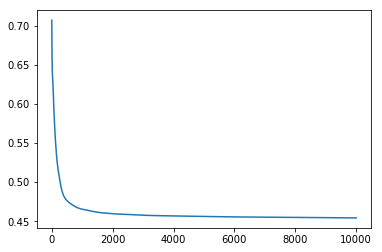

In [333]:
plt.plot(nnet2.errorTrace)

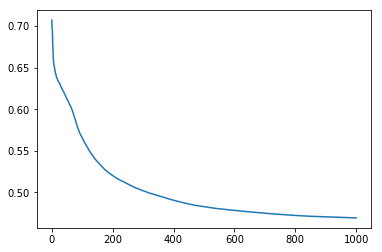

In [334]:
plt.plot(nnet1.errorTrace)

In [142]:
Ttest

array([[ 60,   0],
       [ 60,   0],
       [ 50,   0],
       ..., 
       [ 80,   0],
       [270,   0],
       [ 20,   0]], dtype=int64)

In [143]:
Ttest.shape

(3947, 2)

In [144]:
Tenergy.shape

(19735, 2)

In [146]:
Ytest

array([[  53.64016936,    1.49664544],
       [  72.45245525,    1.23314271],
       [  67.52628688,    4.77338215],
       ..., 
       [ 203.05467934,    3.1594389 ],
       [  49.13973199,    1.42451022],
       [  51.13967415,    5.54682775]])

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
Ttest.shape

(3947, 2)

In [155]:
Ytest.shape

(3947, 2)

In [158]:
Xtest.shape

(3947, 24)

In [168]:
Ttest[:,:1].shape

(3947, 1)

In [164]:
type(Ttest)

numpy.ndarray

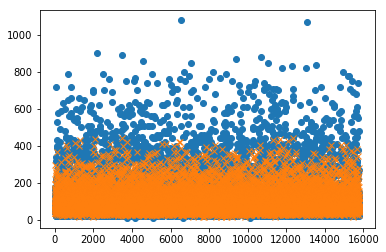

In [391]:
plt.plot(Ttrain[:,:1],'o', Ytrain[:,:1], 'x')

The above graph describes the actual output for training data for Appliances in blue vs the predicted outputs in orange

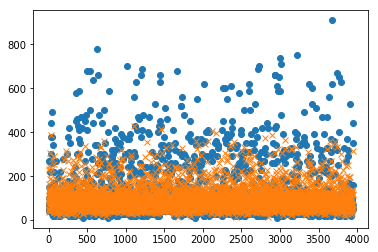

In [374]:
plt.plot(Ttest[:,:1],'o', Ytest[:,:1], 'x')

The above graph describes the actual output for testing data for Appliances in blue vs the predicted outputs in orange

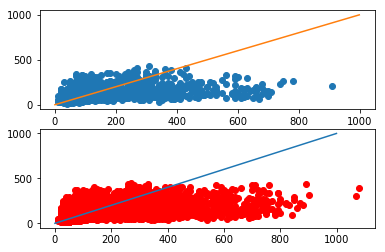

In [389]:
p = np.arange(1000)
plt.subplot(2,1,1)
plt.plot( Ttest[:,:1],Ytest[:,:1], 'o', p )
plt.subplot(2,1,2)
plt.plot( Ttrain[:,:1],Ytrain[:,:1], 'ro', p )

The first graph in blue represents actual data vs predicted for testing set and the second graph in red represents the actual vs predicted for training data and y = x line is drawn just for refence to compare how much the data varies

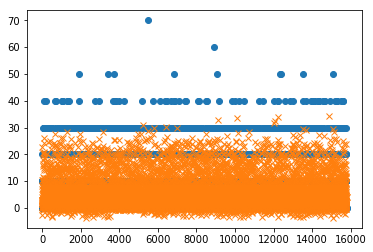

In [390]:
plt.plot( Ttrain[:,1:],'o', Ytrain[:,1:], 'x' )

The above graph describes the actual output for training data for Lights in blue vs the predicted outputs in orange

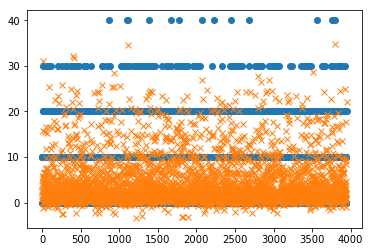

In [375]:
plt.plot( Ttest[:,1:],'o', Ytest[:,1:], 'x' )

The above graph describes the actual output for testing data for Lights in blue vs the predicted outputs in orange

# Classification problem

### Data for Classification Experiment

The [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data was downloaded from the UCI Machine Learning Repository.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data from the file `Frogs_MFCCs.csv` into python.  Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The names of species was given as text and I have converted it to the target class, as an integer. The `numpy` function `unique` was used to identify the different classes.

In [250]:
data_anuran = pd.read_csv('Frogs_MFCCs.csv')

In [251]:
data_anuran.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [196]:
data_anuran.shape

(7195, 26)

In [198]:
Xanuran = data_anuran.iloc[:,:22]

In [199]:
Xanuran.shape

(7195, 22)

In [200]:
Xanuran.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [252]:
Tanuran = data_anuran['Species']

In [253]:
Tanuran.head()

0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

In [206]:
className = np.unique(Tanuran)

In [209]:
list(className)

['AdenomeraAndre',
 'AdenomeraHylaedactylus',
 'Ameeregatrivittata',
 'HylaMinuta',
 'HypsiboasCinerascens',
 'HypsiboasCordobae',
 'LeptodactylusFuscus',
 'OsteocephalusOophagus',
 'Rhinellagranulosa',
 'ScinaxRuber']

In [208]:
type(className)

numpy.ndarray

In [205]:
type(Tanuran)

pandas.core.series.Series

In [210]:
className

array(['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa',
       'ScinaxRuber'], dtype=object)

In [211]:
l={}
for i in range(len(className)):
    l[className[i]] = i

$l$ is a dictionary which has names of species as key and class label as value in form an integer as shown below:

In [212]:
l

{'AdenomeraAndre': 0,
 'AdenomeraHylaedactylus': 1,
 'Ameeregatrivittata': 2,
 'HylaMinuta': 3,
 'HypsiboasCinerascens': 4,
 'HypsiboasCordobae': 5,
 'LeptodactylusFuscus': 6,
 'OsteocephalusOophagus': 7,
 'Rhinellagranulosa': 8,
 'ScinaxRuber': 9}

In [216]:
l[Tanuran[0]]

0

In [254]:
temp = Tanuran.copy()

In [228]:
type(temp)

pandas.core.series.Series

In [229]:
temp.shape

(7195,)

In [231]:
len(list(temp))

7195

In [255]:
temp[:10]

0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
5    AdenomeraAndre
6    AdenomeraAndre
7    AdenomeraAndre
8    AdenomeraAndre
9    AdenomeraAndre
Name: Species, dtype: object

In [256]:
temp[0]

'AdenomeraAndre'

In [234]:
temp.shape

(7195,)

In [237]:
temp[5]

0

The for loop below replaces the name of the species with its respective integer value according to the values in $l$ 

In [257]:
for i in range(len(Tanuran)):
    temp.loc[i] = l[Tanuran.loc[i]]

In [258]:
Tanuran.head()

0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

In [259]:
Tanuran[55]

'AdenomeraAndre'

In [260]:
temp.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: object

In [265]:
temp[1550:1560]

1550    1
1551    1
1552    1
1553    1
1554    1
1555    1
1556    1
1557    1
1558    1
1559    1
Name: Species, dtype: object

In [266]:
Tanuran[1550:1560]

1550    AdenomeraHylaedactylus
1551    AdenomeraHylaedactylus
1552    AdenomeraHylaedactylus
1553    AdenomeraHylaedactylus
1554    AdenomeraHylaedactylus
1555    AdenomeraHylaedactylus
1556    AdenomeraHylaedactylus
1557    AdenomeraHylaedactylus
1558    AdenomeraHylaedactylus
1559    AdenomeraHylaedactylus
Name: Species, dtype: object

In [267]:
np.unique(temp)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [268]:
Tanuran = temp

In [269]:
Tanuran.shape

(7195,)

In [274]:
Tanuran=Tanuran.values.reshape(7195,1)

In [275]:
Tanuran.shape

(7195, 1)

In [276]:
Xanuran.shape

(7195, 22)

In [277]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [279]:
Xanuran.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [284]:
Xanuran = Xanuran.reset_index().values[:,1:] # reseting the index values to convert pandas dataframe object to numpy ndarray object

In [287]:
XtrainC, TtrainC, XtestC, TtestC = ml.partition(Xanuran, Tanuran, (.8,.2), classification=True)
nnetC = nn.NeuralNetworkClassifier(Xanuran.shape[1], [2,2,2], len(np.unique(Tanuran)))
nnetC.train(XtrainC, TtrainC, 100)
Ctrain = nnetC.use(XtrainC)
Ctest = nnetC.use(XtestC)              

In [288]:
nnetC.errorTrace

array([ 0.23025851,  0.21517066,  0.20228806,  0.11713964,  0.1128702 ,
        0.10871449,  0.10559141,  0.10559141,  0.1040455 ,  0.10295496,
        0.10201122,  0.10169859,  0.10122354,  0.09955389,  0.0972681 ,
        0.09540708,  0.09540708,  0.09540708,  0.09441966,  0.0926139 ,
        0.08911434,  0.08724284,  0.08714504,  0.08571822,  0.08346134,
        0.08266752,  0.08171489,  0.08087004,  0.08074933,  0.07976333,
        0.07934158,  0.07876962,  0.07859125,  0.07851579,  0.07833454,
        0.0781896 ,  0.07747253,  0.07735037,  0.07695181,  0.07654312,
        0.07573038,  0.07566778,  0.0754253 ,  0.07530492,  0.07514773,
        0.07510376,  0.07499228,  0.07483399,  0.07441205,  0.07420861,
        0.0734431 ,  0.07323656,  0.07304048,  0.07286531,  0.07247766,
        0.07214667,  0.07158455,  0.07120631,  0.07097787,  0.07095904,
        0.07078317,  0.07068901,  0.07064447,  0.07046512,  0.07034302,
        0.07019986,  0.07009889,  0.06994068,  0.06982501,  0.06

In [315]:
resultsC = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [316]:
summarize(resultsC)

[[0, 0.032731063238359968, 0.039054899235580268, 1.6213123798370361],
 [5, 0.034468380820013897, 0.047394023627519113, 3.6466991901397705],
 [[5, 5], 0.052779708130646273, 0.064072272411396805, 4.788736343383789]]

In [341]:
bestNetwork(summarize(resultsC))

[0, 0.032731063238359968, 0.039054899235580268, 1.6213123798370361]

In [343]:
results_10plusC = trainNNs(Xanuran, Tanuran, 0.8, [1, 3, 7, 10, [2, 2], [3,5], [5,3], [20,20], [5,10,20], [10,5,10], [20,10,5], [20,10,2,10,20]], 10, 100, classify=True)

In [344]:
summarize(results_10plusC)

[[1, 0.30701876302988185, 0.30826963168867272, 4.53558611869812],
 [3, 0.087022237665045174, 0.094440583738707423, 5.92826771736145],
 [7, 0.016539263377345379, 0.030159833217512162, 7.7766969203948975],
 [10, 0.0050208478109798468, 0.024669909659485754, 8.993921756744385],
 [[2, 2], 0.22861362056984014, 0.23446838082001392, 6.0987207889556885],
 [[3, 5], 0.097654621264767191, 0.10521195274496178, 8.129131555557251],
 [[5, 3], 0.11224808895066016, 0.12015288394718555, 7.964183330535889],
 [[20, 20], 0.0, 0.015913829047949964, 21.3287456035614],
 [[5, 10, 20], 0.035006949270326618, 0.043919388464211263, 17.96830916404724],
 [[10, 5, 10], 0.016591382904794998, 0.033495482974287706, 15.095180034637451],
 [[20, 10, 5], 0.052466990965948576, 0.064002779708130647, 18.394540548324585],
 [[20, 10, 2, 10, 20],
  0.11914523974982627,
  0.12585128561501041,
  24.115656852722168]]

In [345]:
bestNetwork(summarize(results_10plusC))

[[20, 20], 0.0, 0.015913829047949964, 21.3287456035614]

# Working with best network [20,20]

In [346]:
XtrainC, TtrainC, XtestC, TtestC = ml.partition(Xanuran, Tanuran, (.8,.2), classification=True)
nnetC = nn.NeuralNetworkClassifier(Xanuran.shape[1], [20,20], len(np.unique(Tanuran)))
nnetC.train(XtrainC, TtrainC, 100)
Ctrain = nnetC.use(XtrainC)
Ctest = nnetC.use(XtestC)              

In [347]:
nnetC.errorTrace

array([  2.30e-01,   1.90e-01,   1.90e-01,   1.73e-01,   9.98e-02,
         7.75e-02,   5.87e-02,   4.83e-02,   4.11e-02,   3.12e-02,
         2.68e-02,   2.42e-02,   2.15e-02,   1.86e-02,   1.71e-02,
         1.46e-02,   1.30e-02,   1.15e-02,   1.01e-02,   9.34e-03,
         8.48e-03,   7.95e-03,   7.35e-03,   6.78e-03,   6.15e-03,
         5.63e-03,   5.20e-03,   4.81e-03,   4.49e-03,   4.17e-03,
         3.97e-03,   3.72e-03,   3.47e-03,   3.29e-03,   2.87e-03,
         2.66e-03,   2.47e-03,   2.36e-03,   2.21e-03,   2.00e-03,
         1.87e-03,   1.75e-03,   1.56e-03,   1.45e-03,   1.36e-03,
         1.25e-03,   1.17e-03,   1.08e-03,   1.02e-03,   9.25e-04,
         8.47e-04,   8.22e-04,   7.76e-04,   7.32e-04,   7.17e-04,
         6.77e-04,   6.36e-04,   6.01e-04,   5.78e-04,   5.52e-04,
         5.38e-04,   5.20e-04,   5.01e-04,   4.84e-04,   4.68e-04,
         4.20e-04,   3.87e-04,   3.64e-04,   3.15e-04,   2.98e-04,
         2.70e-04,   2.45e-04,   2.27e-04,   2.15e-04,   1.96e

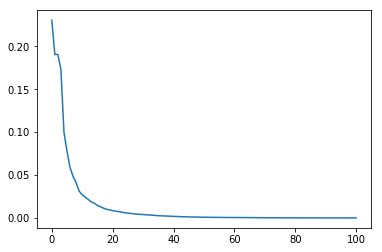

In [348]:
plt.plot(nnetC.errorTrace)

As we can see in the graph above that the error is almost contant, so increasing the number of iterations will not improve our results here.

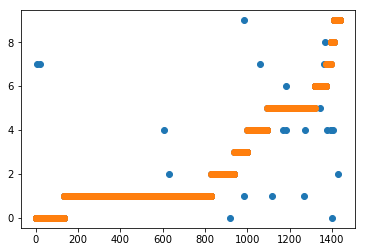

In [360]:
plt.plot(Ctest,'o', TtestC, 'o')

The above graph describes the actual output for testing data for each class in orange vs the predicted outputs in blue

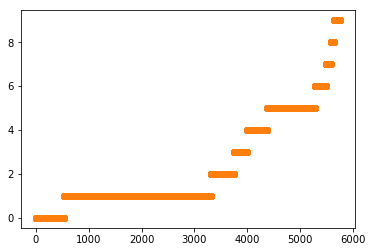

In [362]:
plt.plot(Ctrain,'o', TtrainC, 'o')

The above graph describes the actual output for training data for each class in orange vs the predicted outputs in blue
As all the training data is correctly classified, therefore orange dots overlaps the blue dots.

## Examples


In [2]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

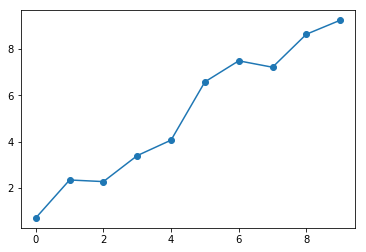

In [4]:
plt.plot(X, T, 'o-');

In [5]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.54681773,  0.54681773,  0.54681773,  0.54681773,
        0.38878294,  0.23861448,  0.14107224,  0.13685632,  0.13159174,
        0.12200331,  0.12004284,  0.11729345,  0.11722774,  0.11720678,
        0.11715971,  0.11713422,  0.11703589,  0.11692493,  0.11690747,
        0.11685124,  0.11684394,  0.1167597 ,  0.11671666,  0.1167157 ,
        0.11670925,  0.11670432,  0.11659393,  0.11658978,  0.11655222,
        0.11654604,  0.11653364,  0.11652125,  0.11651232,  0.11643041,
        0.11641181,  0.11635009,  0.11632274,  0.11627028,  0.11621216,
        0.11609135,  0.11608242,  0.11591254,  0.11590528,  0.11589885,
        0.1155136 ,  0.11544335,  0.11542021,  0.11504797,  0.11502111,
        0.11493809,  0.11459886,  0.11442942,  0.11441328,  0.11395023,
        0.11363951,  0.11361813,  0.11359296,  0.11358183,  0.11356514,
        0.11355584,  0.1135009 ,  0.1135009 ,  0.11228009,  0.11227799,
        0.10874364,  0.10793793,  0.10702195,  0.10697315,  0.10

In [6]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.56525757,  0.56525757,  0.39524885,  0.19323583,
        0.12264838,  0.12072399,  0.11987694,  0.1172533 ,  0.11723656,
        0.11716307,  0.11708904,  0.11703804,  0.11697377,  0.11691969,
        0.11685657,  0.11673941,  0.11668885,  0.11656968,  0.11636348,
        0.11635844,  0.11633   ,  0.1163008 ,  0.11611862,  0.11606465,
        0.11605607,  0.11599594,  0.11598938,  0.11597518,  0.11590839,
        0.11589739,  0.11572317,  0.11428645,  0.11425532,  0.11375641,
        0.11368443,  0.1136587 ,  0.1136587 ,  0.1136587 ,  0.1136587 ,
        0.1136587 ,  0.1136587 ,  0.1136587 ,  0.1136587 ,  0.1136587 ,
        0.1136587 ,  0.1136587 ,  0.1136587 ,  0.1136587 ,  0.1136587 ,
        0.11155752,  0.1112829 ,  0.1112829 ,  0.10990509,  0.10951796,
        0.10843883,  0.10831139,  0.10791009,  0.10791009,  0.10791009,
        0.10791009,  0.10304535,  0.10156609,  0.10047532,  0.09814701,
        0.09682653,  0.09641985,  0.09607158,  0.09455093,  0.09

In [7]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.43375072167655998,
   0.37624645454787348,
   0.30471575510780974,
   0.31353315718640956,
   0.23015326005400058],
  [0.70096159980969919,
   0.89706030712911278,
   1.0374131198044245,
   0.96671156424543547,
   1.39943574790067],
  0.08166050910949707],
 [10,
  [0.35408368779449945,
   0.33801207987223547,
   0.25266683312968857,
   0.325628393726967,
   0.19084427269786955],
  [0.49902098857283622,
   0.84917621636944196,
   0.63893256672827548,
   0.71399064614587793,
   0.9036995116823987],
  0.08032679557800293],
 [[10, 10],
  [0.082126040883002654,
   0.26045151591443155,
   0.20349190311078305,
   0.21492554849445852,
   0.36150969473346434],
  [0.82658843015789518,
   0.54265655087207132,
   0.51718475493734695,
   0.56797423779542033,
   0.73623492281109437],
  0.11718463897705078]]

In [31]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [32]:
summarize(results)

[[0, 0.53143143920050495, 0.5755313396359012, 0.02525186538696289],
 [1, 0.41796988528870666, 0.8019628348277037, 0.48237133026123047],
 [2, 0.319301650214185, 0.79158629335178698, 3.0588934421539307],
 [10, 0.014479537325943773, 1.3689404089207877, 2.4029524326324463],
 [[10, 10], 0.0059205648354279314, 1.263934252184689, 3.949293613433838],
 [[5, 5, 5, 5], 0.10473467510155832, 1.193733162683511, 6.051068544387817],
 [[2, 2, 2, 2, 2],
  0.27347638907453148,
  0.93362462573994121,
  6.222663402557373]]

In [33]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.53143143920050495, 0.5755313396359012, 0.02525186538696289]
Hidden Layers 0 Average RMSE Training 0.53 Testing 0.58 Took 0.03 seconds


Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



Read this data into python.  One suggestion is to use the `loadtxt` function in the `numpy` package.  You may ignore the first column of each row which contains a data and time.  Also ignore the last two columns of random variables.  We will not use that in our modeling of this data.  You will also have to deal with the double quotes that surround every value in every field.  Read the first line of this file to get the names of the features.

Once you have read this in correctly, you should see values like this:

In [11]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [12]:
data.shape

(19735, 26)

In [13]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

Use the first two columns, labelled `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features.  So

In [14]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [15]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [16]:
Tnames

['Appliances', 'lights']

Train several neural networks on all of this data for 100 iterations.  Plot the error trace (nnet.getErrorTrace()) to help you decide now many iterations might be needed.  100 may not be enough.  If for your larger networks the error is still decreasing after 100 iterations you should train all nets for more than 100 iterations.

Now use your `trainNNs`, `summarize`, and `bestNetwork` functions on this data to investigate various network sizes.

In [18]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100)

In [19]:
summarize(results)

[[0, 67.046960179422285, 67.644136371408763, 0.998682975769043],
 [5, 65.301632625880842, 66.328853488839485, 13.130361795425415],
 [[5, 5], 64.277382425810785, 66.416365860755761, 19.365249395370483],
 [[10, 10], 62.741905999268582, 64.979550044221469, 33.62221097946167]]

In [20]:
bestNetwork(summarize(results))

[[10, 10], 62.741905999268582, 64.979550044221469, 33.62221097946167]

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

In [21]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [22]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [23]:
Tanuran[:2]

array([[0],
       [0]])

In [24]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [25]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [26]:
summarize(results)

[[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131],
 [5, 0.035267546907574707, 0.041000694927032663, 5.346082448959351],
 [[5, 5], 0.046699096594857534, 0.057956914523974987, 6.503756046295166]]

In [27]:
bestNetwork(summarize(results))

[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131]